# Исследование объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области

**Описание проекта:** 

На основе архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет необходимо научиться определять рыночную стоимость объектов недвижимости и установить их параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Источник данных:** данные сервиса Яндекс.Недвижимость.

**План выполнения проекта:**

1. [Загрузка данных и изучение общей информации](#1)
2. [Предобработка данных](#2)
- [Обработка дубликатов](#2.1)
- [Обработка пропусков](#2.2)
- [Исследование типов данных](#2.3)
- [Поиск редких и выбивающихся значений](#2.4)
- [Добавление новых столбцов](#2.5)
3. [Исследовательский анализ данных](#3)
- [Изучение параметров объектов](#3.1)
- [Изучение времени продажи объектов](#3.2)
- [Изучение факторов, больше всего влияющих на стоимость объекта](#3.3)
- [Расчет средней цены одного квадратного метра](#3.4)
- [Зависимость стоимости объектов от расстояния до центра города](#3.5)
4. [Общий вывод](#4)

## Загрузка данных и изучение общей информации
<a id="1"></a> 

In [2]:
# Импортирую библиотеки.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.simplefilter("ignore")

In [4]:
# Открываю файл.
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
# Посмотрю данные пяти первых строк.
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

In [6]:
# Посмотрю общую информацию о данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
# Посмотрю на распределение значений в данных.
data.describe().T

count          mean           std      min         25%  \
total_images         23699.0  9.858475e+00  5.682529e+00      0.0        6.00   
last_price           23699.0  6.541549e+06  1.088701e+07  12190.0  3400000.00   
total_area           23699.0  6.034865e+01  3.565408e+01     12.0       40.00   
rooms                23699.0  2.070636e+00  1.078405e+00      0.0        1.00   
ceiling_height       14504.0  2.771499e+00  1.261056e+00      1.0        2.52   
floors_total         23613.0  1.067382e+01  6.597173e+00      1.0        5.00   
living_area          21796.0  3.445785e+01  2.203045e+01      2.0       18.60   
floor                23699.0  5.892358e+00  4.885249e+00      1.0        2.00   
kitchen_area         21421.0  1.056981e+01  5.905438e+00      1.3        7.00   
balcony              12180.0  1.150082e+00  1.071300e+00      0.0        0.00   
airports_nearest     18157.0  2.879367e+04  1.263088e+04      0.0    18585.00   
cityCenters_nearest  18180.0  1.419128e+04  8.608386e+03    181.0     9238.00   
parks_around3000     18181.0  6.114075e-01  8.020736e-01      0.0        0.00   
parks_nearest         8079.0  4.908046e+02  3.423180e+02      1.0      288.00   
ponds_around3000     18181.0  7.702547e-01  9.383456e-01      0.0        0.00   
ponds_nearest         9110.0  5.179809e+02  2.777206e+02     13.0      294.00   
days_exposition      20518.0  1.808886e+02  2.197280e+02      1.0       45.00   

                            50%        75%          max  
total_images               9.00       14.0         50.0  
last_price           4650000.00  6800000.0  763000000.0  
total_area                52.00       69.9        900.0  
rooms                      2.00        3.0         19.0  
ceiling_height             2.65        2.8        100.0  
floors_total               9.00       16.0         60.0  
living_area               30.00       42.3        409.7  
floor                      4.00        8.0         33.0  
kitchen_area               9.10       12.0        112.0  
balcony                    1.00        2.0          5.0  
airports_nearest       26726.00    37273.0      84869.0  
cityCenters_nearest    13098.50    16293.0      65968.0  
parks_around3000           0.00        1.0          3.0  
parks_nearest            455.00      612.0       3190.0  
ponds_around3000           1.00        1.0          3.0  
ponds_nearest            502.00      729.0       1344.0  
days_exposition           95.00      232.0       1580.0

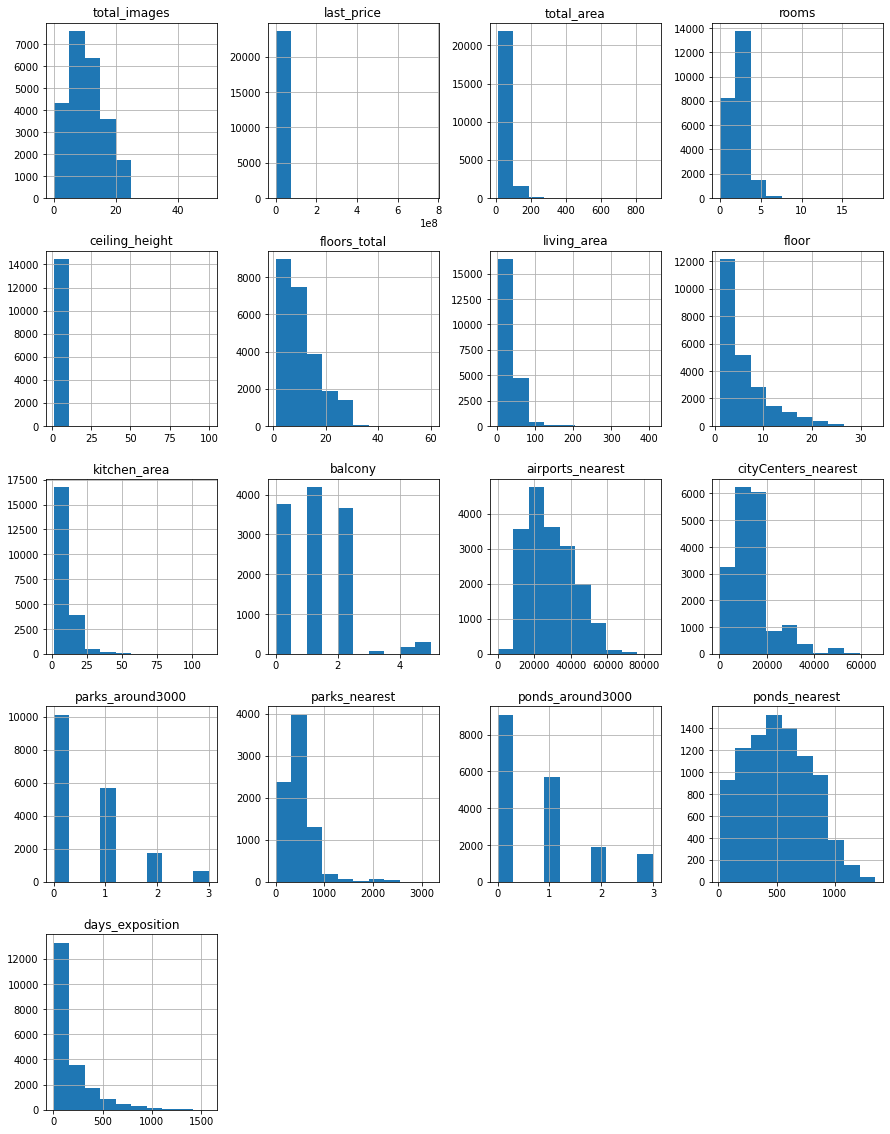

In [8]:
# Построю общую гистограмму для всех числовых столбцов таблицы.
data.hist(figsize=(15, 20));

**Описание данных:**

В датафрейме 22 столбца и 23699 строк. В ряде столбцов есть аномальные значения и неверный тип данных. В 14 столбцах из 22 имеются пропуски.

**total_images** — число фотографий квартиры в объявлении. Минимальное значение - 0, максимальное 50. Пропуски отсутствуют. Тип данных - int64, изменение типа данных не требуется.

**last_price** — цена на момент снятия с публикации (руб.). Минимальное значение - 12190 руб., это очень маленькое значение и не характерно для рынка недвижимости Санкт-Петербурга и Ленинградской области. Максимальное значение 763 000 000 руб., очень большая цена, но возможна для элитных объектов. Пропуски отсутствуют. Тип данных - float64, изменение типа данных не требуется.

**total_area** — общая площадь квартиры в квадратных метрах (м²). Минимальное значение - 12 м², это слишком мало. Следует проверить, являются ли такие значения выбросами и в таком случае их можно будет удалить. Максимальное значение - 900 м². Это много, но возможно для элитной недвижимости, поэтому удалять их не стоит. При этом медианное значение - 52 м², что выглядит весьма правдоподобно. Пропуски отсутствуют. Тип данных - float64, изменение типа данных не требуется.

**first_day_exposition** — дата публикации. Пропуски отсутствуют. Тип данных - object, следует изменить на datetime64.

**rooms** — число комнат. Минимальное число комнат 0. Возможно, тут имелись в виду квартиры студии. Максимальное значение - 19. Учитывая, что максимальная площадь квартир - 900 м², это возможно для элитной недвижимости.  Пропуски отсутствуют. Тип данных - int64, изменение типа данных не требуется.

**ceiling_height** — высота потолков (м). Минимальная высота потолков 1 м., максимальная - 100 м. Это, вероятно, ошибки. Такие значения буду удалять. В столбце 9195 пропущенных значений. Заполню их медианным значением в зависимости от количества этажей в доме, так как вероятно что в домах с равным количеством этажей (то есть в домах схожего типа) одинаковая высота потолков. Тип данных - float64, изменение типа данных не требуется.

**floors_total** — всего этажей в доме. Минимальное значение - 1. В обласных населенных пунктах могут быть одноэтажные дома. Максимальное количество этажей 60. Это, вероятно, ошибка, так как самое высокое жилое здание в Санкт-Петербурге и окретностях - "Князь Александр Невский" имеет 37 этажей. Поэтому объекты со значением более 37 следует удалить. В столбце имеется 86 пропусков. Это 0,3% от всего количества значений. Значение количества этажей в доме понадобится в дальнейшем исследовании для определения к какому типу относится этаж (первый, последний, другой). Поэтому заполнение этого столбца недостоверной информацией может исказить результаты исследования. Учитывая не значительное число пропусков, считаю возможным их удалить. Тип данных - float64, следует изменить на int64.

**living_area**  — жилая площадь в квадратных метрах (м²). Минимальная жилая площадь - 2 м². Это, вероятно, ошибка. Такие объекты следует удалить. Максимальное значение - 409,7 м², это возможно для элитной недвижимости. В столбце 1903 пропуска. Чтобы их заполнить сгруппирую данные по количеству комнат и рассчитаю медианы соотношения жилой и нежилой площади. Затем заполню пропуски, умножив найденную медиану на общую площадь объекта. Тип данных - float64, изменение типа данных не требуется.

**floor** — этаж. Минимальное значение - 1, максимальное - 33, выглядит правдоподобно. Пропуски отсутствуют. Тип данных - int64, изменение типа данных не требуется.

**is_apartment** — апартаменты (булев тип).  В столбце 20924 пропусков. Вероятно, пользователи часто не указывают тип недвижимости, если он просто жилой. Т.к. в этом столбце булев тип данных, пропуски можно заменить на False. При этом тип данных указан как object вместо bool. Это могло произойти из-за наличия пропусков.

**studio** — квартира-студия (булев тип). Пропуски отсутствуют. Тип данных - bool, изменение типа данных не требуется.

**open_plan** — свободная планировка (булев тип). Пропуски отсутствуют. Тип данных - bool, изменение типа данных не требуется.

**kitchen_area**  — площадь кухни в квадратных метрах (м²). Миниммальная площадь кухни 1,3 м². Максимальное значение - 112 м². Учитывая, что в датасете имеются квартиры-студии, квартиры со свободной планировкой, а также квартиры с большой площадью, площадь кухни может быть и очень большой, и совсем маленькой. В столбце 2278 пропусков. Заполню их по анологии с пропусками в столбце living_area. Тип данных - float64, изменение типа данных не требуется.

**balcony** — число балконов. В столбце 11519 пропусков. Вероятно, пользователи при отсутствии балконов их не указывают. Заменю пропуски на 0. Тип данных float64, следует заменить их на int.

**locality_name** — название населённого пункта. В столбце 49 пропусков, это 0,2% от всего количества значений. Заполнение их какими-то недостоверными данными может исказить всю информацию, так как расположение квартиры является очень значимой характеристикой. Так как их совсем мало, считаю возможным удалить эти строки. Тип данных - object, изменение типа данных не требуется.

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м). Минимальное расстояние до аэропорта 0 м, это невозможно. Или это ошибка, или данных не было и их заполнили нулем. На гисторгамме видно, что их крайне мало, поэтому такие объекты следует удалить. В столбце 5542 пропусков, это 23% от общего числа значений. Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Заполнение их какими-то недостоверными данными может исказить всю информацию, их слишком много, чтобы можно было удалить, поэтому пропуски оставлю. Тип данных - float64, изменение типа данных не требуется.

**city_centers_nearest** — расстояние до центра города (м). В столбце 5519 пропусков, это 23% от общего числа значений. Вероятно, пропуски возникли в связи с отсутствием информации о картографических данных. Заполнение их какими-то недостоверными данными может исказить всю информацию, их слишком много, чтобы можно было удалить, поэтому пропуски оставлю. Максимальное значение - 65968.0 м. Это неправдоподобно много для любого города. Следует посмотреть, какие значения можно отнести к выбросам и удалить их. Тип данных - float64, изменение типа данных не требуется.

**parks_around_3000** — число парков в радиусе 3 км. В столбце 5518 пропусков, это 23% от общего числа значений. Вероятно, пропуски возникли в связи с отсутствием информации о картографических данных. Заполнение их какими-то недостоверными данными может исказить всю информацию, их слишком много, чтобы можно было удалить, поэтому пропуски оставлю. Тип данных - float64, следует заменить их на int.

**parks_nearest**  — расстояние до ближайшего парка (м). В столбце 15620 пропусков. Более половины объектов не имеют информации о ближайшем парке. Вероятно, пропуски возникли в связи с отсутствием информации о картографических данных. Пропуски в данном столбце на задачи исследования не повлияют, оставлю их. Тип данных - float64, изменение типа данных не требуется.

**ponds_around_3000** - число водоёмов в радиусе 3 км. В столбце 5518 пропусков. Число совпадает с числом пропусков parks_around_3000, вероятно картографических данных не хватает по одним и тем же объектам. Пропуски в столбце на исследование не повлияют, оставлю их без изменений.

**ponds_nearest** — расстояние до ближайшего водоёма (м). В столбце 14589 пропусков. Больше половины объектов не имеют информации о ближайшем парке. Вероятно, пропуски возникли в связи с отсутствием информации о картографических данных. Пропуски в столбце на задачи исследования не повлияют, оставлю их без изменений.

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия). Минимальное количество дней размещения объявления - 1. Продажа недвижимости за 1 день или снятие объявления по другой причине - допустимый вариант. Максимальное значение - 1580 дней (больше 4-х лет), возможно для непривлекательных объектов. В столбце 3181 пропуск. Возможно, это техническая ошибка, которая произошла в момент сбора/выгрузки данных, или эти объекты все еще не проданы, поэтому объявления не сняты. Заполнить значения нечем, оставлю пропуски без изменений.

## Предобработка данных
<a id="2"></a>

### Обработка дубликатов
<a id="2.1"></a> 

In [9]:
# Проверяю наличие явных дубликатов.
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

In [10]:
# Вывожу все уникальные значения столбца locality_name, чтобы обработать неявные дубликаты.
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [11]:
# Из списка уникальных значений населенных пунктов видно, что некоторые написаны через букву "ё", а некоторые через "е". 
# Поэтому сначала заменю все "ё" на "е".
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [12]:
# Теперь заменю все варианты типа населенного пункта, где упаминается поселок, просто на "поселок".
def replace_duplicates(wrong_value, correct_value):
    for wrong_value in wrong_values:
        data['locality_name'] = data['locality_name'].str.replace(wrong_value, correct_value)
wrong_values = ['поселок городского типа', 'городской поселок', 'поселок станции', \
                'коттеджный поселок', 'поселок при железнодорожной станции']
correct_value = 'поселок'
replace_duplicates(wrong_values, correct_value)

**Вывод:** Явные дубликаты отсутствуют. Неявные дубликаты обработаны.

### Обработка пропусков
<a id="2.2"></a> 

In [13]:
# Нахожу количество пропущенных значений в каждом столбце.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
# Удаляю пропуски в сстолбце 'locality_name'.
data = data.dropna(subset=['locality_name'])

In [15]:
# Удаляю пропуски в сстолбце 'floors_total'.
data = data.dropna(subset=['floors_total'])

In [16]:
# Заполню пропуски в столбце ceiling_height по медианному значению этого столбца по каждому значению в столбце floors_total.
for floor in data['floors_total'].unique():
    data.loc[(data['floors_total'] == floor) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == floor), 'ceiling_height'].median()

In [17]:
# Проверка наличия пропусков.
data['ceiling_height'].isna().sum()

1

In [18]:
# Остался всего один пропуск. Его можно удалить.
data = data.dropna(subset=['ceiling_height'])

Заполню пропуски в столбце 'living_area'. Для этого сгруппирую данные по количеству комнат и рассчитаю медианы соотношения жилой и нежилой площади. Затем заполню пропуски, умножив найденную медиану на общую площадь объекта.

In [19]:
# Cгруппирую данные по количеству комнат и рассчитаю медианы соотношения жилой и нежилой площади.
median_living_area = data.groupby('rooms')['living_area'].median()
median_total_area = data.groupby('rooms')['total_area'].median()
part_living_area = median_living_area / median_total_area

In [20]:
# Заполню пропуски в столбце 'living_area'.
for room in part_living_area.index:
    data.loc[((data['rooms'] == room) & 
(data['living_area'].isnull())), 'living_area'] = data.loc[:,'total_area'] * part_living_area[room]

In [21]:
# Проверка наличия пропусков.
data['living_area'].isna().sum()

0

Пропуски в столбце 'kitchen_area' (площадь кухни) тоже буду заполнять в зависимости от количества комнат. В представленной информации есть квартиры, в которых количество комнат равно 0. Предполажу, что это студии или квартиры со свободной планировкой. Площадь кухни в них определить нельзя. В таких квартирах приравняю площадь кухни к 0.

In [22]:
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [23]:
# Проверка наличия оставшихся пропусков.
data['kitchen_area'].isna().sum()

2028

In [24]:
# Оставшиеся пропуски заполню по аналогии с заполнением столбца 'living_area'.
median_kitchen_area = data.groupby('rooms')['kitchen_area'].median()
median_total_area = data.groupby('rooms')['total_area'].median()
part_kitchen_area = median_kitchen_area / median_total_area

In [25]:
for room in part_kitchen_area.index:
    data.loc[((data['rooms'] == room) & 
(data['kitchen_area'].isnull())), 'kitchen_area'] = data.loc[:,'total_area'] * part_kitchen_area[room]

In [26]:
# Проверка наличия пропусков.
data['kitchen_area'].isna().sum()

0

In [27]:
# Заменю пропущенные значения в столбце 'is_apartment' на False.
data['is_apartment'] = data['is_apartment'].fillna(False)

In [28]:
# Проверка наличия пропусков.
data['is_apartment'].isna().sum()

0

In [29]:
# Заполню пропуски в столбце 'balcony' на 0.
data['balcony'] = data['balcony'].fillna(0)

In [30]:
# Проверка наличия пропусков.
data['balcony'].isna().sum()

0

In [31]:
# Еще раз посмотрю на количество пропущенных значений в каждом столбце.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15534
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**вывод:** Пропуски в столбцах locality_name, floors_total, ceiling_height, living_area, kitchen_area, balcony, is_apartment обработаны. Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition не подлежат заполнению или удалению, поэтому их пришлось оставить.   

### Исследование типов данных
<a id="2.3"></a> 

In [32]:
# Еще раз посмотрю общую информацию о данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23564 non-null  int64  
 1   last_price            23564 non-null  float64
 2   total_area            23564 non-null  float64
 3   first_day_exposition  23564 non-null  object 
 4   rooms                 23564 non-null  int64  
 5   ceiling_height        23564 non-null  float64
 6   floors_total          23564 non-null  float64
 7   living_area           23564 non-null  float64
 8   floor                 23564 non-null  int64  
 9   is_apartment          23564 non-null  bool   
 10  studio                23564 non-null  bool   
 11  open_plan             23564 non-null  bool   
 12  kitchen_area          23564 non-null  float64
 13  balcony               23564 non-null  float64
 14  locality_name         23564 non-null  object 
 15  airports_nearest   

In [33]:
# Изменяю тип данных столбца 'first_day_exposition' на datetime64.
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [34]:
# Изменяю тип данных столбца 'floors_total' на int.
data['floors_total'] = data['floors_total'].astype('int')

In [35]:
# Изменяю тип данных столбца 'balcony' на int.
data['balcony'] = data['balcony'].astype('int')

In [36]:
# Еще раз посмотрю общую информацию о данных, чтобы проверить, изменились ли тыпы данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  float64       
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23564 non-null  int64         
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

**Вывод:** Типы данных в столбцах first_day_exposition, floors_total, balcony изменены.

### Поиск редких и выбивающихся значений
<a id="2.4"></a> 

In [37]:
# Посмотрю на распределение значений в данных.
data.describe().T

count          mean           std      min         25%  \
total_images         23564.0  9.878459e+00  5.681274e+00      0.0        6.00   
last_price           23564.0  6.539916e+06  1.091114e+07  12190.0  3400000.00   
total_area           23564.0  6.032110e+01  3.565683e+01     12.0       40.00   
rooms                23564.0  2.070616e+00  1.078596e+00      0.0        1.00   
ceiling_height       23564.0  2.735741e+00  9.970198e-01      1.0        2.55   
floors_total         23564.0  1.067493e+01  6.593360e+00      1.0        5.00   
living_area          23564.0  3.463624e+01  2.277106e+01      2.0       18.70   
floor                23564.0  5.877016e+00  4.868615e+00      1.0        2.00   
kitchen_area         23564.0  1.040163e+01  5.857173e+00      0.0        7.00   
balcony              23564.0  5.937023e-01  9.606727e-01      0.0        0.00   
airports_nearest     18040.0  2.879764e+04  1.263263e+04      0.0    18563.00   
cityCenters_nearest  18063.0  1.419231e+04  8.613461e+03    181.0     9238.00   
parks_around3000     18064.0  6.116032e-01  8.020971e-01      0.0        0.00   
parks_nearest         8030.0  4.905804e+02  3.415730e+02      1.0      288.00   
ponds_around3000     18064.0  7.693756e-01  9.385486e-01      0.0        0.00   
ponds_nearest         9035.0  5.183380e+02  2.779867e+02     13.0      293.00   
days_exposition      20393.0  1.807477e+02  2.197363e+02      1.0       45.00   

                            50%         75%           max  
total_images               9.00       14.00  5.000000e+01  
last_price           4646000.00  6790000.00  7.630000e+08  
total_area                52.00       69.70  9.000000e+02  
rooms                      2.00        3.00  1.900000e+01  
ceiling_height             2.65        2.75  1.000000e+02  
floors_total               9.00       16.00  6.000000e+01  
living_area               30.00       42.30  4.275467e+02  
floor                      4.00        8.00  3.300000e+01  
kitchen_area               9.00       11.78  1.215000e+02  
balcony                    0.00        1.00  5.000000e+00  
airports_nearest       26757.00    37273.00  8.486900e+04  
cityCenters_nearest    13095.00    16285.00  6.596800e+04  
parks_around3000           0.00        1.00  3.000000e+00  
parks_nearest            455.00      612.00  3.190000e+03  
ponds_around3000           1.00        1.00  3.000000e+00  
ponds_nearest            503.00      730.00  1.344000e+03  
days_exposition           95.00      231.00  1.580000e+03

*Обработаю значения столбца last_price*

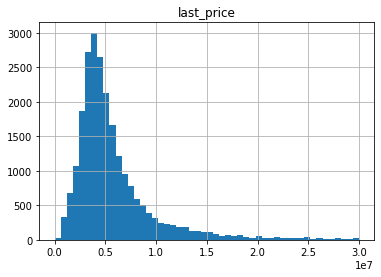

In [38]:
# Построю гистограмму для столбца 'last_price'.
data.hist('last_price', bins=50, range=(0,3e7));

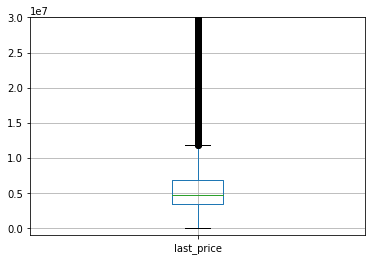

In [39]:
# Построю диаграмму размаха для столбца 'last_price'.
plt.ylim(-0.1e7,3e7)
data.boxplot('last_price');

Судя по построенным графикам, значения выше 12 млн. руб. можно считать выбросами. Но в данном случае, ограничивать значения цены такой суммой считаю некорректным. Квартиры в Санкт-Петербурге могут стоить и намного дороже, особенно если это элитная недвижимость. Поэтому такие значения удалять не стоит. А вот значения близкие к нулю выглядят неправдоподобно.

In [40]:
# Проверю сколько квартир с ценой менее 500 000 руб.
data.query('last_price < 5e5')['last_price'].count()

14

In [41]:
# Удаляю из датафрейма квартиры с ценой менее 500 000 руб.
data = data.query('last_price >= 5e5')

*Обработаю значения столбца total_area*

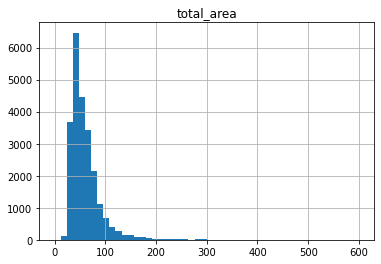

In [42]:
# Построю гистограмму и диаграмму размаха для столбца 'total_area'.
data.hist('total_area', range=(0,600),  bins=50);

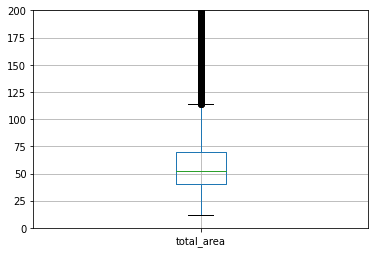

In [43]:
plt.ylim(0, 200)
data.boxplot('total_area');

Судя по графикам, выбросами можно считать значения площади меньше 13 кв.м. и больше 115 кв.м. Значения меньше 13 кв.м. удалю. Значения больше 115 кв.м. удалять не буду, т.к. квартиры могут быть большими. В том числе элитная недвижимость площадью до 900 кв.м.

In [44]:
# Удаляю из датафрейма квартиры площадью менее 13 кв.м.
data = data.query('total_area >= 13')

In [45]:
#data.query('total_area > 600')['total_area'].count()

In [46]:
# Удаляю из датафрейма квартиры площадью менее 13 кв.м.
#data = data.query('total_area <= 600')

*Обработаю значения столбца ceiling_height*

In [47]:
data['ceiling_height'].describe().T

count    23549.000000
mean         2.735798
std          0.997331
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [48]:
data.describe().T

count          mean           std       min  \
total_images         23549.0  9.880589e+00  5.681156e+00       0.0   
last_price           23549.0  6.543725e+06  1.091357e+07  500000.0   
total_area           23549.0  6.033279e+01  3.566159e+01      13.0   
rooms                23549.0  2.071043e+00  1.078736e+00       0.0   
ceiling_height       23549.0  2.735798e+00  9.973312e-01       1.0   
floors_total         23549.0  1.067854e+01  6.592421e+00       1.0   
living_area          23549.0  3.464425e+01  2.277546e+01       2.0   
floor                23549.0  5.878296e+00  4.867722e+00       1.0   
kitchen_area         23549.0  1.040218e+01  5.855080e+00       0.0   
balcony              23549.0  5.940380e-01  9.608659e-01       0.0   
airports_nearest     18038.0  2.879763e+04  1.263308e+04       0.0   
cityCenters_nearest  18061.0  1.419332e+04  8.613295e+03     181.0   
parks_around3000     18062.0  6.115602e-01  8.021311e-01       0.0   
parks_nearest         8028.0  4.904920e+02  3.415690e+02       1.0   
ponds_around3000     18062.0  7.693500e-01  9.385385e-01       0.0   
ponds_nearest         9034.0  5.183904e+02  2.779575e+02      13.0   
days_exposition      20379.0  1.807725e+02  2.197596e+02       1.0   

                            25%         50%         75%           max  
total_images               6.00        9.00       14.00  5.000000e+01  
last_price           3413000.00  4650000.00  6799000.00  7.630000e+08  
total_area                40.00       52.00       69.70  9.000000e+02  
rooms                      1.00        2.00        3.00  1.900000e+01  
ceiling_height             2.55        2.65        2.75  1.000000e+02  
floors_total               5.00        9.00       16.00  6.000000e+01  
living_area               18.70       30.00       42.30  4.275467e+02  
floor                      2.00        4.00        8.00  3.300000e+01  
kitchen_area               7.00        9.00       11.78  1.215000e+02  
balcony                    0.00        0.00        1.00  5.000000e+00  
airports_nearest       18559.00    26757.00    37273.00  8.486900e+04  
cityCenters_nearest     9238.00    13098.00    16285.00  6.596800e+04  
parks_around3000           0.00        0.00        1.00  3.000000e+00  
parks_nearest            288.00      455.00      612.00  3.190000e+03  
ponds_around3000           0.00        1.00        1.00  3.000000e+00  
ponds_nearest            293.00      503.00      730.00  1.344000e+03  
days_exposition           45.00       95.00      231.00  1.580000e+03

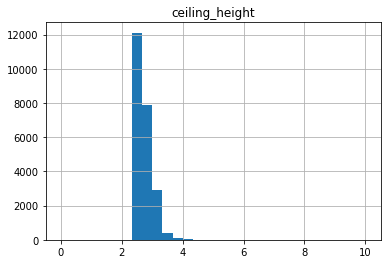

In [49]:
# Построю гистограмму и диаграмму размаха для столбца 'ceiling_height'.
data.hist('ceiling_height', bins=30, range=(0,10));

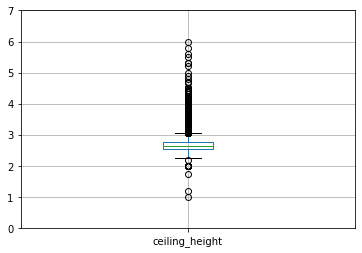

In [50]:
plt.ylim(0,7)
data.boxplot('ceiling_height');

На графиках видно, что наибольшее число значений сосредоточено в диапазоне от 2,5 до 3 м. Это соответствует нормам СНиП, согласно которым высота от пола до потолка должна быть в пределах 2,5-3,2 м. Можно предположить, что квартиры с высотой потолков более 25м на самом деле являются опечаткой и соотвествуют 2,5м. Следовательно нужно поделить такие значения на 10. 
После этого удалю квартиры с высотой потолков менее 2,5 м и более 4 м.

In [51]:
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] = data['ceiling_height'] / 10

In [52]:
data = data.query('2.5 <= ceiling_height <= 4')

*Обработаю значения столбца floors_total*

In [53]:
# Удаляю значения столбца floors_total, превышающие 37.
data = data.query('floors_total <= 37')

*Обработаю значения столбца living_area*

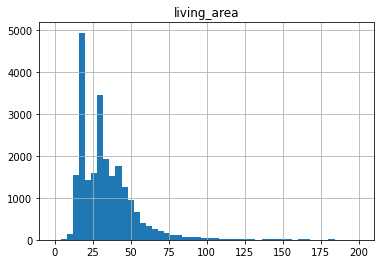

In [54]:
# Построю гистограмму и диаграмму размаха для столбца 'living_area'.
data.hist('living_area', bins=50, range=(0,200));

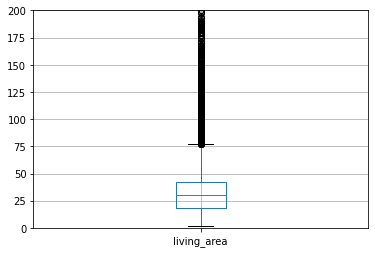

In [55]:
plt.ylim(0,200)
data.boxplot('living_area');

На графиках видно, что значения более 75 кв.м. можно считать выбросами. Но учитывая, что ранее было принято решение не удалять объекты с большой площадью, эти значения тоже следует оставить. Но значения близкие к нулю выглядят неправдоподобно. Если их не много, удалю их.

In [56]:
# Проверяю количество значений столбца living_area менее 10.
data.query('living_area < 10')['living_area'].count()

36

In [57]:
# Значений столбца living_area менее 10 не много, поэтому их можно удалить.
data = data.query('living_area >= 10')

*Обработаю значения столбца airports_nearest*

In [58]:
# Посмотрю на распределение значений в столбце airports_nearest.
data['airports_nearest'].describe()

count    17914.000000
mean     28807.073071
std      12644.374414
min          0.000000
25%      18542.750000
50%      26770.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

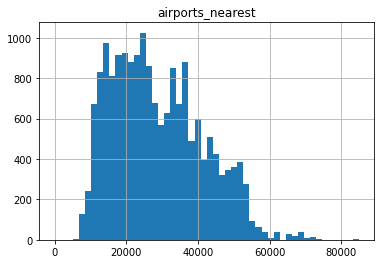

In [59]:
# Построю гистограмму и диаграмму размаха для столбца 'airports_nearest'.
data.hist('airports_nearest', bins=50);

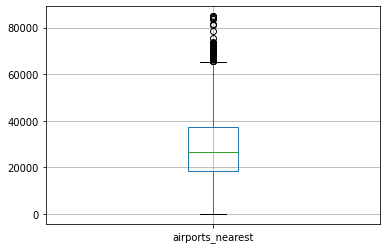

In [60]:
data.boxplot('airports_nearest');

Судя по диаграмме размаха, значения больше 65 км можно считать выбросами. Но эти значения реальны для расстояний до аэропорта, поэтому их удалять не стоит. Максимальное значение равное 85 км тоже выглядит правдоподобно.

In [61]:
# Проверяю количество значений столбца airports_nearest равных 0.
data.query('airports_nearest == 0')['airports_nearest'].count()

1

In [62]:
# Значение столбца airports_nearest равное 0 всего 1, поэтому его можно удалить.
data = data.query('airports_nearest != 0')

In [63]:
#Обновлю индексы в датафрейме.
data = data.reset_index(drop = True)

In [64]:
# Еще раз посмотрю общую информацию о данных, чтобы проверить, изменились ли тыпы данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23380 entries, 0 to 23379
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23380 non-null  int64         
 1   last_price            23380 non-null  float64       
 2   total_area            23380 non-null  float64       
 3   first_day_exposition  23380 non-null  datetime64[ns]
 4   rooms                 23380 non-null  int64         
 5   ceiling_height        23380 non-null  float64       
 6   floors_total          23380 non-null  int64         
 7   living_area           23380 non-null  float64       
 8   floor                 23380 non-null  int64         
 9   is_apartment          23380 non-null  bool          
 10  studio                23380 non-null  bool          
 11  open_plan             23380 non-null  bool          
 12  kitchen_area          23380 non-null  float64       
 13  balcony         

**Вывод:** Редкие и аномальные значения удалены. Всего из датафрейма удалено 319 строк, что составляет 1,3% первоначального количества. Это не исказит результаты исследования.

### Добавление новых столбцов
<a id="2.5"></a> 

In [65]:
# Добавляю столбец price_per_sqm - цена одного квадратного метра.
data['price_per_sqm'] = data['last_price'] / data['total_area']

In [66]:
# Добавляю столбец day_of_week - день недели публикации объявления (0 - понедельник, 1 - вторник и т.д.).
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [67]:
# Добавляю столбец month - месяц публикации объявления.
data['month'] = data['first_day_exposition'].dt.month

In [68]:
# Добавляю столбец year - год публикации объявления.
data['year'] = data['first_day_exposition'].dt.year

In [69]:
# Добавляю столбец floor_category - тип этажа квартиры (значения — «первый», «последний», «другой»).
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
)

In [70]:
# Добавляю столбец city_centers_nearest_km - расстояние в км до центра города.
data['city_centers_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23380 entries, 0 to 23379
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23380 non-null  int64         
 1   last_price               23380 non-null  float64       
 2   total_area               23380 non-null  float64       
 3   first_day_exposition     23380 non-null  datetime64[ns]
 4   rooms                    23380 non-null  int64         
 5   ceiling_height           23380 non-null  float64       
 6   floors_total             23380 non-null  int64         
 7   living_area              23380 non-null  float64       
 8   floor                    23380 non-null  int64         
 9   is_apartment             23380 non-null  bool          
 10  studio                   23380 non-null  bool          
 11  open_plan                23380 non-null  bool          
 12  kitchen_area             23380 n

In [72]:
data.describe().T

count          mean           std            min  \
total_images             23380.0  9.882678e+00  5.678676e+00       0.000000   
last_price               23380.0  6.504473e+06  1.075506e+07  500000.000000   
total_area               23380.0  6.023708e+01  3.507693e+01      13.000000   
rooms                    23380.0  2.070445e+00  1.076821e+00       0.000000   
ceiling_height           23380.0  2.705105e+00  2.191422e-01       2.500000   
floors_total             23380.0  1.069098e+01  6.578536e+00       1.000000   
living_area              23380.0  3.458900e+01  2.238803e+01      10.000000   
floor                    23380.0  5.882849e+00  4.868088e+00       1.000000   
kitchen_area             23380.0  1.038903e+01  5.815420e+00       0.000000   
balcony                  23380.0  5.936270e-01  9.604447e-01       0.000000   
airports_nearest         17913.0  2.880868e+04  1.264290e+04    6450.000000   
cityCenters_nearest      17933.0  1.421168e+04  8.609095e+03     181.000000   
parks_around3000         17934.0  6.094569e-01  8.008888e-01       0.000000   
parks_nearest             7952.0  4.904352e+02  3.420558e+02       1.000000   
ponds_around3000         17934.0  7.681499e-01  9.377540e-01       0.000000   
ponds_nearest             8961.0  5.183069e+02  2.777530e+02      13.000000   
days_exposition          20232.0  1.806761e+02  2.197179e+02       1.000000   
price_per_sqm            23380.0  9.929036e+04  4.980606e+04    9615.384615   
day_of_week              23380.0  2.567964e+00  1.787446e+00       0.000000   
month                    23380.0  6.401027e+00  3.492104e+00       1.000000   
year                     23380.0  2.017371e+03  1.037687e+00    2014.000000   
city_centers_nearest_km  17933.0  1.420549e+01  8.617248e+00       0.000000   

                                  25%         50%           75%           max  
total_images             6.000000e+00        9.00  1.400000e+01  5.000000e+01  
last_price               3.430000e+06  4650000.00  6.790000e+06  7.630000e+08  
total_area               4.000000e+01       52.00  6.970000e+01  9.000000e+02  
rooms                    1.000000e+00        2.00  3.000000e+00  1.900000e+01  
ceiling_height           2.550000e+00        2.65  2.750000e+00  4.000000e+00  
floors_total             5.000000e+00        9.00  1.600000e+01  3.600000e+01  
living_area              1.875410e+01       30.00  4.230000e+01  4.275467e+02  
floor                    2.000000e+00        4.00  8.000000e+00  3.300000e+01  
kitchen_area             7.000000e+00        9.00  1.174451e+01  1.215000e+02  
balcony                  0.000000e+00        0.00  1.000000e+00  5.000000e+00  
airports_nearest         1.854500e+04    26770.00  3.731000e+04  8.486900e+04  
cityCenters_nearest      9.274000e+03    13109.00  1.629300e+04  6.596800e+04  
parks_around3000         0.000000e+00        0.00  1.000000e+00  3.000000e+00  
parks_nearest            2.870000e+02      453.50  6.120000e+02  3.190000e+03  
ponds_around3000         0.000000e+00        0.00  1.000000e+00  3.000000e+00  
ponds_nearest            2.940000e+02      503.00  7.300000e+02  1.344000e+03  
days_exposition          4.500000e+01       95.00  2.310000e+02  1.580000e+03  
price_per_sqm            7.664971e+04    95000.00  1.140782e+05  1.907500e+06  
day_of_week              1.000000e+00        3.00  4.000000e+00  6.000000e+00  
month                    3.000000e+00        6.00  1.000000e+01  1.200000e+01  
year                     2.017000e+03     2017.00  2.018000e+03  2.019000e+03  
city_centers_nearest_km  9.000000e+00       13.00  1.600000e+01  6.600000e+01

**Вывод:** Необходимые столбцы добавлены. Следует отметить, что из-за пропусков в исходных данных, в столбце city_centers_nearest_km также есть пропуски. 

## Исследовательский анализ данных
<a id="3"></a> 

### Изучение параметров объектов
<a id="3.1"></a> 

#### Общая площадь
<a id="3.1.1"></a> 

In [73]:
# Посмотрю на распределение значений в столбце total_area.
data['total_area'].describe()

count    23380.000000
mean        60.237075
std         35.076926
min         13.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

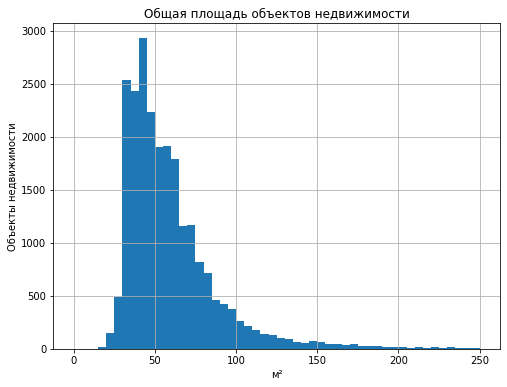

In [74]:
# Построю гистограмму для столбца total_area.
data['total_area'].hist(bins=50, figsize=(8, 6), range=(0, 250))
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Объекты недвижимости');

Диапазон значений от 13 до 900 м². Большая часть объектов недвижимости имеют площадь от 40 до 70 м². Самый распространенный вариант - около 45 м². Площадь объектов менее 30 м² и более 100 м² встречается редко. Среднее значение - 60 м² и медиана 52 м². Среднее значение больше медианы из-за наличия очень больших значений, их не так много, но график получается растянутым влево.

#### Жилая площадь
<a id="3.1.2"></a> 

In [75]:
# Посмотрю на распределение значений в столбце living_area.
data['living_area'].describe()

count    23380.000000
mean        34.589004
std         22.388033
min         10.000000
25%         18.754098
50%         30.000000
75%         42.300000
max        427.546729
Name: living_area, dtype: float64

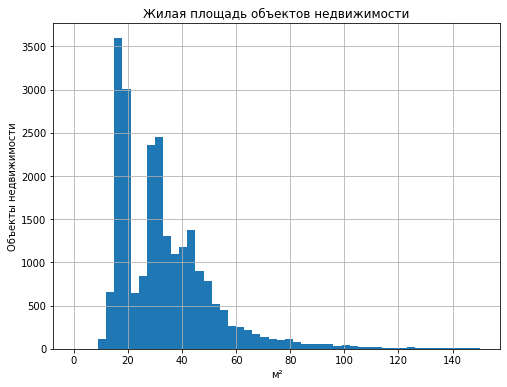

In [76]:
# Построю гистограмму для столбца living_area.
data['living_area'].hist(bins=50, figsize=(8, 6), range=(0, 150))
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Объекты недвижимости');

Диапазон значений от 10 до более 400 м². Большая часть объектов недвижимости имеют жилую площадь от 18 до 42 м². Самый распространенный вариант - около 15 м². Жилая площадь объектов менее 15 м² и более 60 м² встречается редко. Среднее значение - 34 м², медиана 30 м². График также получился растянутым влево из-за больших, но редких значений.

#### Площадь кухни
<a id="3.1.3"></a> 

In [77]:
# Посмотрю на распределение значений в столбце kitchen_area.
data['kitchen_area'].describe()

count    23380.000000
mean        10.389031
std          5.815420
min          0.000000
25%          7.000000
50%          9.000000
75%         11.744505
max        121.500000
Name: kitchen_area, dtype: float64

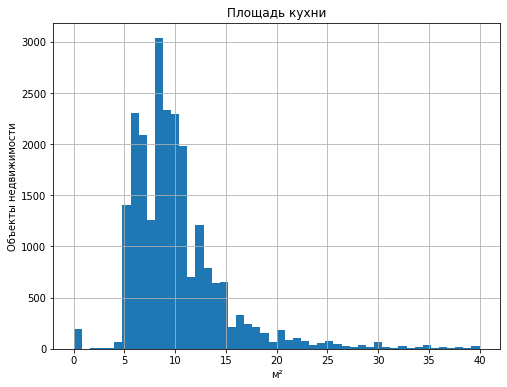

In [78]:
# Построю гистограмму для столбца kitchen_area.
data['kitchen_area'].hist(bins=50, figsize=(8, 6), range=(0, 40))
plt.title('Площадь кухни')
plt.xlabel('м²')
plt.ylabel('Объекты недвижимости');

Диапазон значений от 0 до 121 м². Большая часть объектов недвижимости имеют площадь кухни от 7 до 12 м². Самый распространенный вариант - около 8 м². Площадь кухни менее 5 м² и более 15 м² встречается редко. Среднее значение - 10,4 м², медиана 9 м². График также получился растянутым влево из-за больших, но редких значений.

#### Цена объекта
<a id="3.1.4"></a> 

In [79]:
# Посмотрю на распределение значений в столбце last_price.
data['last_price'].describe()

count    2.338000e+04
mean     6.504473e+06
std      1.075506e+07
min      5.000000e+05
25%      3.430000e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

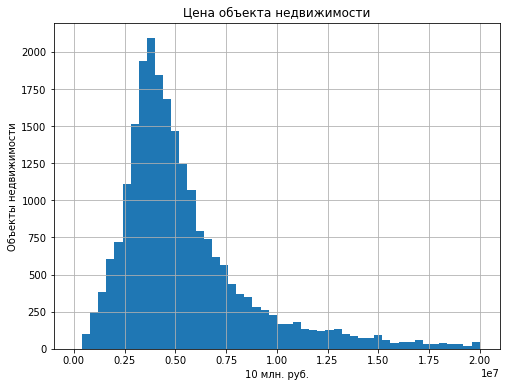

In [80]:
# Построю гистограмму для столбца last_price last_price.
data['last_price'].hist(bins=50, figsize=(8, 6), range=(0, 20e6))
plt.title('Цена объекта недвижимости')
plt.xlabel('10 млн. руб.')
plt.ylabel('Объекты недвижимости');

Диапазон значений от 500 тыс. руб. до 760 млн руб.. Большинство объектов недвижимости имеют цену от 3,5 до 6,7 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн немного. Среднее значение - 6,5 млн, медиана 4,6 млн. График также получился растянутым влево из-за больших, но редких значений.

#### Количество комнат
<a id="3.1.5"></a> 

In [81]:
# Посмотрю на распределение значений в столбце rooms.
data['rooms'].describe() 

count    23380.000000
mean         2.070445
std          1.076821
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

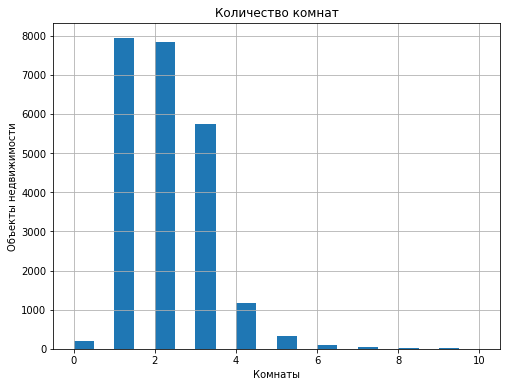

In [82]:
# Построю гистограмму для столбца rooms.
data['rooms'].hist(bins=20, figsize=(8, 6), range=(0, 10))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Объекты недвижимости');

Диапазон значений от 0 до 19 комнат. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов с 4-5 комнатами относительно немного. Среднее и медиана равны 2 комнатам. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение.

#### Высота потолков
<a id="3.1.6"></a> 

In [83]:
# Посмотрю на распределение значений в столбце ceiling_height.
data['ceiling_height'].describe()

count    23380.000000
mean         2.705105
std          0.219142
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

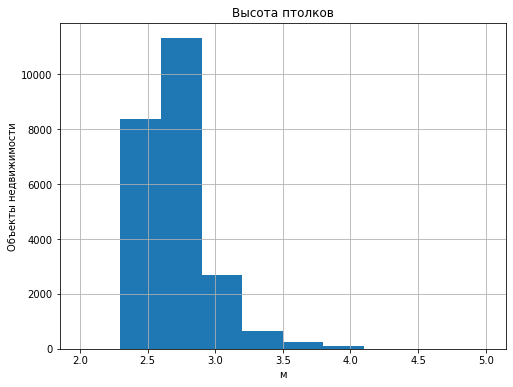

In [84]:
# Построю гистограмму для столбца ceiling_height.
data['ceiling_height'].hist(bins=10, figsize=(8, 6), range=(2, 5))
plt.title('Высота птолков')
plt.xlabel('м')
plt.ylabel('Объекты недвижимости');

Диапазон значений от 2,5 до 4 м. Большинство объектов недвижимости имеют высоту потолков от 2,5 м до 2,7 м. Значения больше 2,7 м встречаются редко. Среднее и медиана равны 2,7 м.

#### Этаж квартиры
<a id="3.1.7"></a> 

In [85]:
# Посмотрю на распределение значений в столбце floor.
data['floor'].describe()

count    23380.000000
mean         5.882849
std          4.868088
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

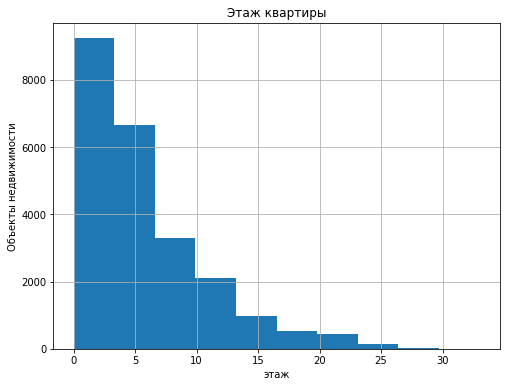

In [86]:
# Построю гистограмму для столбца floor.
data['floor'].hist(bins=10, figsize=(8, 6), range=(0, 33))
plt.title('Этаж квартиры')
plt.xlabel('этаж')
plt.ylabel('Объекты недвижимости');

Диапазон значений от 1 до 33. Большинство объектов недвижимости расположены с 1 по 4 этаж. Реже встречаются варианты больше 6. Среднее значение - 5 этаж, медиана - 4 этаж. График растянут влево из-за наличия редких значений больше 15.

#### Тип этажа квартиры 
<a id="3.1.8"></a> 
*(«первый», «последний», «другой»)*

In [87]:
# Посмотрю на кол-во значений в каждой категории.
data['floor_category'].value_counts()

другой       17222
последний     3281
первый        2877
Name: floor_category, dtype: int64

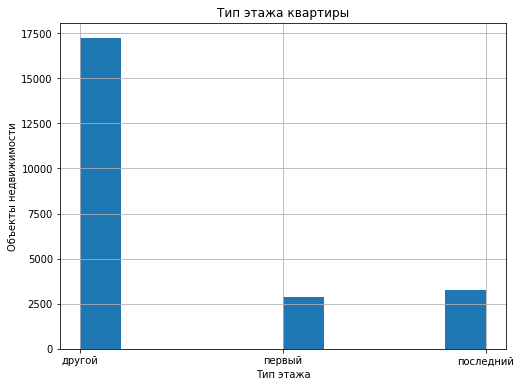

In [88]:
# Построю гистограмму для столбца floor_category.
data['floor_category'].hist(figsize=(8, 6))
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Объекты недвижимости');

На графике видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.

#### Общее количество этажей в доме
<a id="3.1.9"></a> 

In [89]:
# Посмотрю на распределение значений в столбце floors_total.
data['floors_total'].describe()

count    23380.000000
mean        10.690975
std          6.578536
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

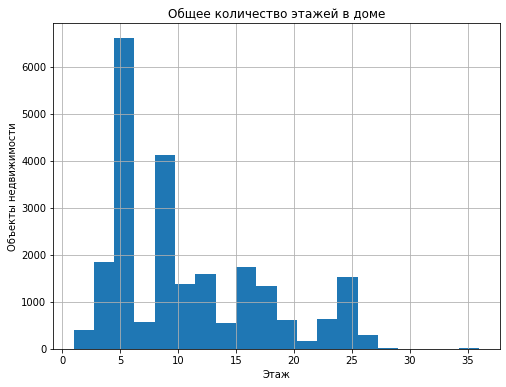

In [90]:
# Построю гистограмму для столбца floors_total.
data['floors_total'].hist(figsize=(8, 6), bins=20)
plt.title('Общее количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Объекты недвижимости');

Диапазон значений с 1 до 36 этажей. Большинство объектов недвижимости - это 5-ти и 9-ти этажные дома. Остальные варианты представлены реже. Среднее значение - 10 этажей, медиана - 9 этажей.

#### Расстояние до центра города
<a id="3.1.10"></a> 

In [91]:
# Посмотрю на распределение значений в столбце cityCenters_nearest.
data['cityCenters_nearest'].describe()

count    17933.000000
mean     14211.677187
std       8609.094859
min        181.000000
25%       9274.000000
50%      13109.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

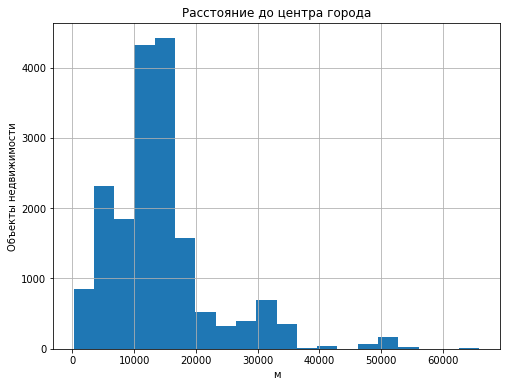

In [92]:
# Построю гистограмму для столбца cityCenters_nearest.
data['cityCenters_nearest'].hist(figsize=(8, 6), bins=20)
plt.title('Расстояние до центра города')
plt.xlabel('м')
plt.ylabel('Объекты недвижимости');

Диапазон значений от 180 м до 66 км. Большинство объектов недвижимости расположены на удалении 10 до 14 км от центра. Остальные варианты представлены реже. Среднее значение - 14 км, медиана - 13 км.

#### Расстояние до ближайшего аэропорта
<a id="3.1.11"></a> 

In [93]:
# Посмотрю на распределение значений в столбце airports_nearest.
data['airports_nearest'].describe()

count    17913.000000
mean     28808.681237
std      12642.895178
min       6450.000000
25%      18545.000000
50%      26770.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

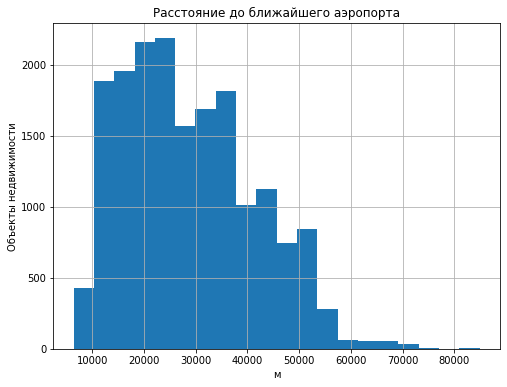

In [94]:
# Посмотрю гистограмму для столбца airports_nearest.
data['airports_nearest'].hist(figsize=(8, 6), bins=20)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('м')
plt.ylabel('Объекты недвижимости');

Диапазон значений от 6,5 до 85 км. Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 18-37 км. Среднее значение - 28,8 км, медиана - 26,8 км.

#### Расстояние до ближайшего парка
<a id="3.1.12"></a> 

In [95]:
# Посмотрю на распределение значений в столбце parks_nearest.
data['parks_nearest'].describe()

count    7952.000000
mean      490.435236
std       342.055830
min         1.000000
25%       287.000000
50%       453.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

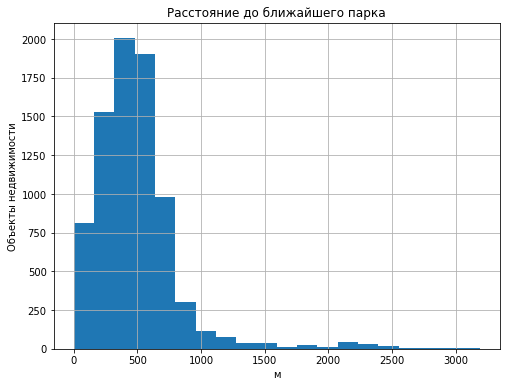

In [96]:
# Посмотрю гистограмму для столбца parks_nearest.
data['parks_nearest'].hist(figsize=(8, 6), bins=20)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('м')
plt.ylabel('Объекты недвижимости');

Диапазон значений с 1 до 3000 м. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии от 300 до 600 м. Среднее значение - 490 м, медиана - 453,5 м.

#### День публикации объявления
<a id="3.1.13"></a> 

In [97]:
# Посмотрю на распределение значений в столбце day_of_week.
data['day_of_week'].value_counts()

3    4237
1    4131
4    3960
2    3916
0    3563
5    1913
6    1660
Name: day_of_week, dtype: int64

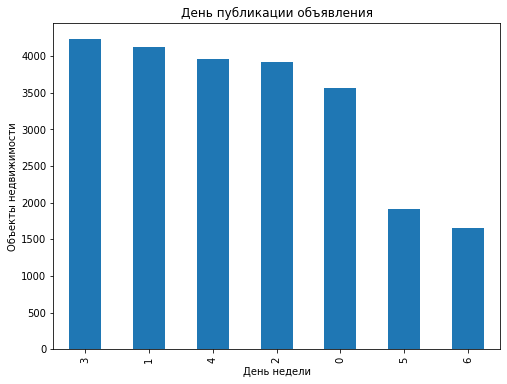

In [98]:
# Построю гистограмму для столбца day_of_week.
data['day_of_week'].value_counts().plot.bar(figsize=(8, 6))
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Объекты недвижимости');

По графику видно, что чаще всего объявления публиковали в будние дни, реже в выходные дни.

#### Месяц публикации объявления
<a id="3.1.14"></a> 

In [99]:
# Посмотрю на распределение значений в столбце month.
data['month'].value_counts()

2     2613
3     2557
4     2343
11    2340
10    2094
9     1959
6     1734
8     1724
7     1669
12    1622
1     1473
5     1252
Name: month, dtype: int64

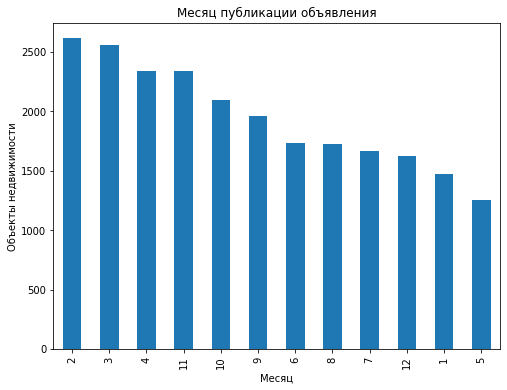

In [100]:
# Построю гистограмму для столбца month.
data['month'].value_counts().plot.bar(figsize=(8, 6))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Объекты недвижимости');

По графику видно, что чаще всего объявления публиковали после январских праздников - в феврале. Наименьшие показатели в январе и мае. Можно предположить, что это из-за большого количествава выходных и праздничных дней в эти месяцы.

**Вывод:** На основании изученных данных можно получить представление о типичном объекте на рынке недвижимости Санкт-Петербурга и Ленинградской области: это 1 или 2-х комнатная квартира на 1-4 этажах 5-и или 9-и этажных домов, общей площадью от 40 до 70 м², с площадью кухни от 7 до 12 м², с высотой потолков 2,7 м, стоимостью от 3.5 до 6.7 млн.руб, расположенная на удалении от центра на расстоянии 10 - 14 км, от аэропорта на расстоянии 18 - 37 км, до ближайшего парка около от 300 до 600 метров.

### Изучение времени продажи квартир
<a id="3.2"></a> 

In [101]:
# Посмотрю на распределение значений в столбце days_exposition.
data['days_exposition'].describe()

count    20232.000000
mean       180.676107
std        219.717872
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

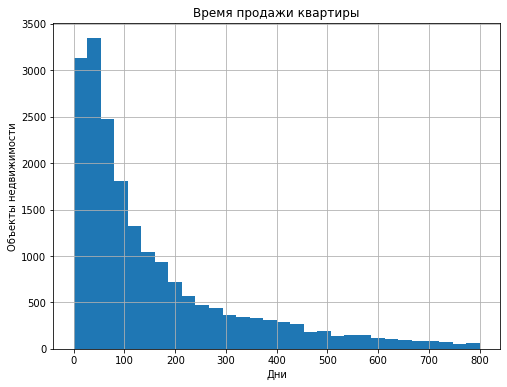

In [102]:
# Построю гистограмму для столбца days_exposition.
data['days_exposition'].hist(figsize=(8, 6), bins=30, range=(0, 800))
plt.title('Время продажи квартиры')
plt.xlabel('Дни')
plt.ylabel('Объекты недвижимости');

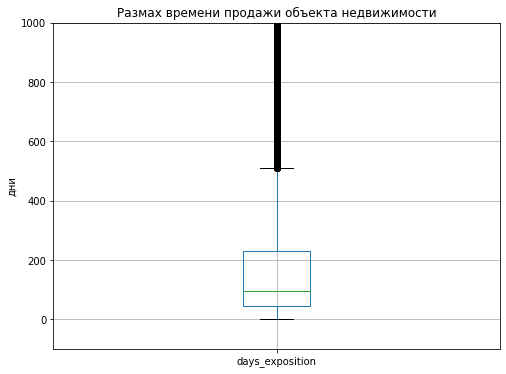

In [103]:
# Построю диаграмму размаха для столбца days_exposition.
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 1000)
plt.ylabel('дни');

**Вывод:** Время продажи квартир варьируется с 1 до 1580 дней. Большинство квартир продают от 45 до 231 дней. Значения от 1 до 45 дней можно считать быстрыми продажами, более 500 дней - слишком долгими.

### Изучение факторов, больше всего влияющих на стоимость объекта
<a id="3.3"></a> 

Изучаю, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

In [104]:
# Создаю список столбцов для изучения.
column_list = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'day_of_week',
    'month',
    'year']

In [105]:
# Создаю матрицу корреляции и вывожу ее на экран.
corr_matrix = data[column_list].corr()
display(corr_matrix)

last_price  total_area  living_area  kitchen_area     rooms  \
last_price      1.000000    0.646753     0.577707      0.476808  0.358847   
total_area      0.646753    1.000000     0.945825      0.624967  0.761694   
living_area     0.577707    0.945825     1.000000      0.458486  0.831503   
kitchen_area    0.476808    0.624967     0.458486      1.000000  0.292671   
rooms           0.358847    0.761694     0.831503      0.292671  1.000000   
day_of_week     0.000926   -0.006028    -0.004980     -0.008641 -0.005143   
month           0.001375    0.003977    -0.001366      0.002610 -0.003896   
year           -0.040267   -0.075641    -0.067079     -0.057800 -0.052926   

              day_of_week     month      year  
last_price       0.000926  0.001375 -0.040267  
total_area      -0.006028  0.003977 -0.075641  
living_area     -0.004980 -0.001366 -0.067079  
kitchen_area    -0.008641  0.002610 -0.057800  
rooms           -0.005143 -0.003896 -0.052926  
day_of_week      1.000000  0.014074 -0.002678  
month            0.014074  1.000000 -0.271098  
year            -0.002678 -0.271098  1.000000

Наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше  площадь квартиры, тем больше ее стоимость. Также отмечается более слабая положительная линейная связь между стоимостью квартиры и жилой площадью, площадью кухни и количеством комнат. Соответственно чем больше жилая площадь, площадь кухни и количество комнат, тем больше стоимость квартиры. Между стоимостью квартиры и днем недели, месяцем или годом публикации объявления линейная связь отсутствует.

#### Площадь
<a id="3.3.1"></a> 

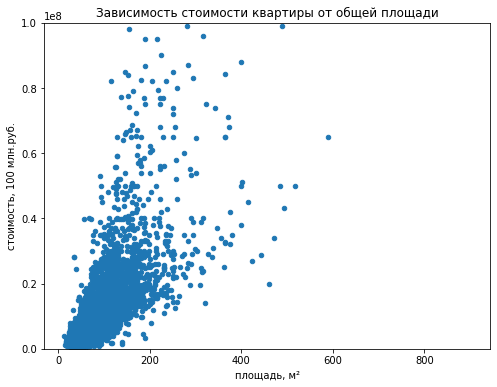

In [106]:
# Построю график зависимости стоимости квартиры от общей площади'
data.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6))

plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000);

На графике видна прямопропорциональная зависимость стоимости квартиры от ее площади: чем больше площадь, тем больше стоимость.

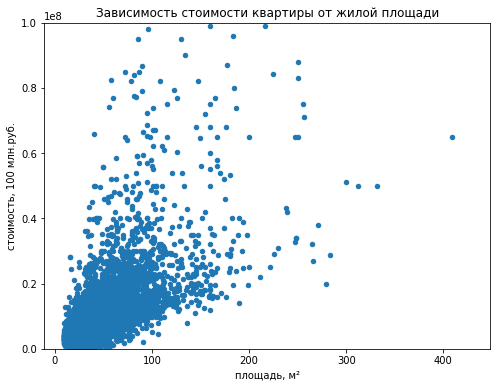

In [107]:
# Построю график зависимости стоимости квартиры от жилой площади'
data.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6))

plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000);

На графике видна прямопропорциональная зависимость стоимости квартиры от жилой площади: чем больше жилая площадь, тем больше стоимость.

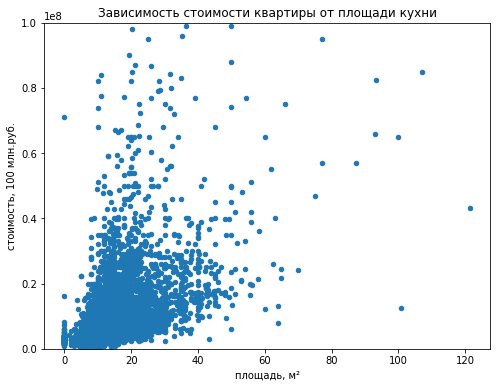

In [108]:
# Построю график зависимости стоимости квартиры от площади кухни'
data.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6))

plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000);

На графике видна прямопропорциональная зависимость стоимости квартиры от площади кухни: чем больше площадь кухни, тем больше стоимость.

#### Количество комнат
<a id="3.3.2"></a> 

In [109]:
# Создаю сводную таблицу по количеству комнат.
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', 
                                              aggfunc = ['count', 'mean'])
# Присваиваю названия колонкам
pivot_table_rooms.columns = ['count', 'mean']
# Вывожу таблицу на экран
pivot_table_rooms

count          mean
rooms                     
0        191  3.327862e+06
1       7935  3.838984e+06
2       7839  5.593172e+06
3       5743  8.152513e+06
4       1165  1.335371e+07
5        318  2.222039e+07
6        101  3.162528e+07
7         57  5.070586e+07
8         12  5.022417e+07
9          8  3.415236e+07
10         3  2.616667e+07
11         2  2.525000e+07
12         1  4.200000e+08
14         2  2.682950e+07
15         1  6.500000e+07
16         1  2.850000e+07
19         1  3.225000e+07

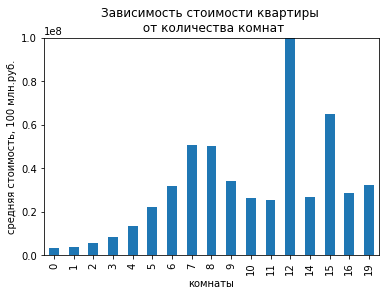

In [110]:
#Строю график зависимости стоимости квартиры от количества комнат
pivot_table_rooms.plot(kind = 'bar', y = 'mean', legend=False)
plt.title('Зависимость стоимости квартиры \n от количества комнат')
plt.xlabel('комнаты')
plt.ylabel('средняя стоимость, 100 млн.руб.')
plt.ylim(0, 100000000);

Для квартир, имеющих до 8 комнат, можно проследить прямопропорциональную зависимость стоимости квартиры от количства комнат: с увеличением количества комнат стоимость квартиры растет. Квартиры, имеющие более 8 комнат, стоят почти одинаково и в среднем дешевле, чем 7-8 комнатные. Это может быть связано с тем, что в старом фонде недвижимости могут быть квартиры с большим колисеством маленьких комнат. Есть два пика из очень дорогих квартир с 12 и 15 комнатами. Видимо это элитная недвижимость.

#### День недели публикации объявления
<a id="3.3.3"></a> 

In [111]:
# Создаю сводную таблицу по дню недели публикации объявления.
pivot_table_day = data.pivot_table(index = 'day_of_week', values = 'last_price', 
                                              aggfunc = ['count', 'mean'])
# Присваиваю названия колонкам
pivot_table_day.columns = ['count', 'mean']
# Вывожу таблицу на экран
pivot_table_day

count          mean
day_of_week                     
0             3563  6.475551e+06
1             4131  6.374429e+06
2             3916  6.622730e+06
3             4237  6.631129e+06
4             3960  6.324477e+06
5             1913  6.949684e+06
6             1660  6.204252e+06

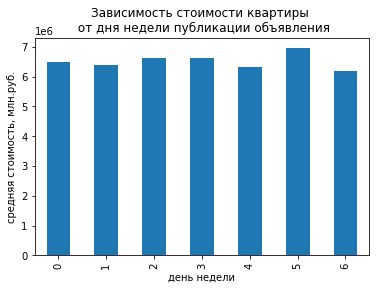

In [112]:
#Строю график зависимости стоимости квартиры от дня недели публикации объявления.
pivot_table_day.plot(kind = 'bar', y = 'mean', legend=False)
plt.title('Зависимость стоимости квартиры \n от дня недели публикации объявления')
plt.xlabel('день недели')
plt.ylabel('средняя стоимость, млн.руб.');

Взаимосвязь цены и дня публикации объявления отсутствует.

#### Месяц публикации объявления
<a id="3.3.4"></a> 

In [113]:
# Создаю сводную таблицу по месяцу публикации объявления.
pivot_table_month = data.pivot_table(index = 'month', values = 'last_price', 
                                              aggfunc = ['count', 'mean'])
# Присваиваю названия колонкам
pivot_table_month.columns = ['count', 'mean']
# Вывожу таблицу на экран
pivot_table_month

count          mean
month                     
1       1473  6.648996e+06
2       2613  6.484997e+06
3       2557  6.337016e+06
4       2343  6.708784e+06
5       1252  6.534781e+06
6       1734  6.252362e+06
7       1669  6.499527e+06
8       1724  6.365528e+06
9       1959  6.845281e+06
10      2094  6.162117e+06
11      2340  6.406711e+06
12      1622  6.943761e+06

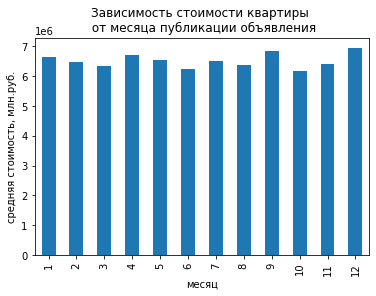

In [114]:
#Строю график зависимости стоимости квартиры от месяца публикации объявления.
pivot_table_month.plot(kind = 'bar', y = 'mean', legend=False)
plt.title('Зависимость стоимости квартиры \n от месяца публикации объявления')
plt.xlabel('месяц')
plt.ylabel('средняя стоимость, млн.руб.');

Взаимосвязь цены и месяца публикации объявления отсутствует.

#### Год публикации объявления
<a id="3.3.5"></a> 

In [115]:
# Создаю сводную таблицу по году публикации объявления.
pivot_table_year = data.pivot_table(index = 'year', values = 'last_price', 
                                              aggfunc = ['count', 'mean'])
# Присваиваю названия колонкам
pivot_table_year.columns = ['count', 'mean']
# Вывожу таблицу на экран
pivot_table_year

count          mean
year                     
2014    135  1.181732e+07
2015   1156  8.373832e+06
2016   2728  6.828367e+06
2017   8102  6.530338e+06
2018   8405  5.934158e+06
2019   2854  6.792542e+06

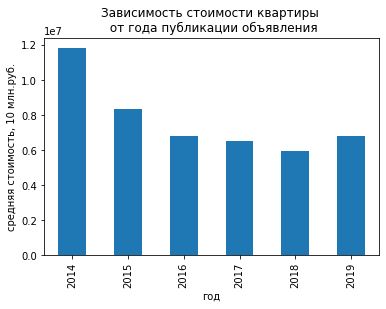

In [116]:
#Строю график зависимости стоимости квартиры от года и публикации объявления.
pivot_table_year.plot(kind = 'bar', y = 'mean', legend=False)
plt.title('Зависимость стоимости квартиры \n от года публикации объявления')
plt.xlabel('год')
plt.ylabel('средняя стоимость, 10 млн.руб.');

В 2014 - 2016 гг. наблюдается снижение средней стоимости квартир с 12 до 8 млн. руб. С 2016 г. средняя стоимость квартир остается примерно на одном уровне.

#### Этаж публикации объявления
<a id="3.3.6"></a> 

Чтобы посмотреть связь между этажом и стоимостью квартиры построю сводную таблицу и визуализирую результаты на графике.

In [117]:
# Создаю сводную таблицу
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', 
                                              aggfunc = ['count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor_category.columns = ['count', 'median']
# Вывожу таблицу на экран
pivot_table_floor_category

count     median
floor_category                  
другой          17222  4850000.0
первый           2877  3900000.0
последний        3281  4300000.0

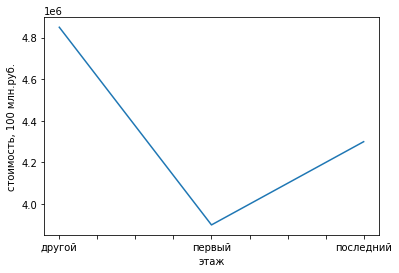

In [118]:
#Строю график зависимости
pivot_table_floor_category.plot(y = 'median', legend=False)
plt.xlabel('этаж')
plt.ylabel('стоимость, 100 млн.руб.');


Из графика видно, что самую большую медианную стоимость имеют квартиры, расположенные ни на первом, ни на последнем этаже. Квартиры на первом этаже имеют наименьшую медианную стоимость. 

**Вывод:** На стоимость квартиры больше всего влияет ее общая площадь, в меньшей степени жилая площадь и площадь кухни. На первых и последних этажах квартиры стоят меньше, чем на остальных. С 2014 по 2016 гг. средняя стоимость снижалась. День и месяц публикации объявления на стоимость не влияют.

###  Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
<a id="3.4"></a> 

In [119]:
# Вывожу 10 населенных пунктов с наибольшим числом объявлений.
top_10_localities = data['locality_name'].value_counts().head(10)
top_10_localities

Санкт-Петербург      15534
поселок Мурино         550
поселок Шушары         438
Всеволожск             396
Пушкин                 365
Колпино                337
поселок Парголово      326
Гатчина                307
деревня Кудрово        299
Выборг                 234
Name: locality_name, dtype: int64

In [120]:
# Вывожу среднюю цену за 1 м² в топ 10 населенных пунктах.
top_10_localities_pivot = data.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', 
                                                                                              values='price_per_sqm')
top_10_localities_pivot.sort_values(by='price_per_sqm', ascending=False)

price_per_sqm
locality_name                   
Санкт-Петербург    114611.872757
Пушкин             103079.873482
деревня Кудрово     92473.547576
поселок Парголово   90205.423758
поселок Мурино      85597.668295
поселок Шушары      78577.014984
Колпино             75443.972838
Гатчина             68746.146763
Всеволожск          68670.459639
Выборг              58190.128008

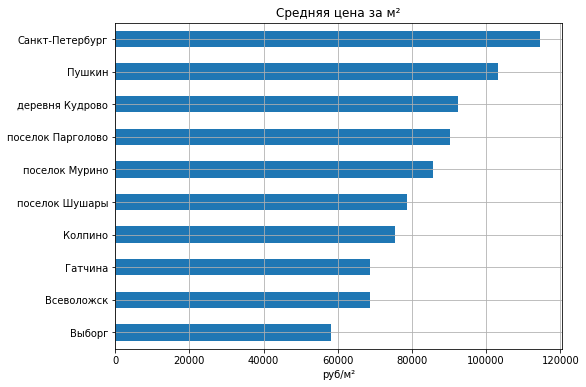

In [121]:
# Отображу на графике среднюю цену квадратного метра в топ 10 населенных пунктах
top_10_localities_pivot.sort_values(by='price_per_sqm').plot(kind='barh', grid=True, figsize=(8, 6), legend=False)
plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('');

**Вывод:** Самая большая средняя цена за 1 м² у квартир, расположенных в Санкт-Петербурге. Далее по стоимости идет Пушкин. Наименьшая цена за м² в Выборге.

### Зависимость стоимости объектов от расстояния до центра города
<a id="3.5"></a>

In [122]:
# Создаю сводную таблицу с данными о цене м² квартир в Санкт-Петербурге в зависимости от удаления от центра.
spb_data = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='price_per_sqm')

In [123]:
# Вывожу первые 5 строк сводной таблицы.
spb_data.head()

price_per_sqm
city_centers_nearest_km               
0.0                      253433.411994
1.0                      175545.494749
2.0                      155890.519273
3.0                      121391.801297
4.0                      133055.166413

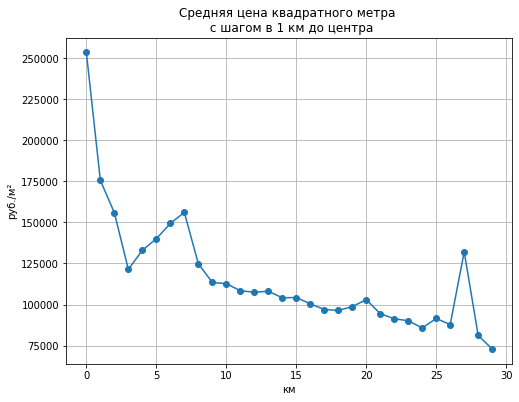

In [124]:
# Строю график зависимости цены м² от удаления от центра.
spb_data.plot(marker='o', grid=True, figsize=(8, 6), legend=False)
plt.title('Средняя цена квадратного метра \n с шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²');

**Вывод:** Из графика видно, что наибольшая стоимость м² у самого центра (до 1 км). Два пика в районе 6 и 27 км могут быть обусловлены, что эти квартиры относятся к элитным. После 8-го км форма графика становится линейной и стоимость начинается уменьшаться.

## Общий вывод 
<a id="4"></a>

**В ходе исследования установлено:**

**Типичный объект на рынке недвижимости Санкт-Петербурга и Ленинградской области:** это 1 или 2-х комнатная квартира на 1-4 этажах 5-и или 9-и этажных домов, общей площадью от 40 до 70 м², с площадью кухни от 7 до 12 м², с высотой потолков 2,7 м, стоимостью от 3.5 до 6.7 млн.руб, расположенная на удалении от центра на расстоянии 10 - 14 км, от аэропорта на расстоянии 18 - 37 км, до ближайшего парка около от 300 до 600 метров.

**Факторы больше всего влияющие на стоимость квартиры:**
- *Общая, жилая площадь и площадь кухни:* чем больше площадь, тем выше стоимость квартиры;
- *Количество комнат:* для квартир, имеющих до 8 комнат, прослеживается прямопропорциональная взаимосвязь; квартиры, имеющие более 8 комнат, стоят почти одинаково и в среднем дешевле, чем 7-8 комнатные.
- *Этаж:* квартиры на первом и последнем этажах стоят дешевле, чем на других;
- *Год публикации уравнения*: в 2014 - 2016 гг. наблюдается снижение средней стоимости квартир, с 2016 г. средняя стоимость квартир остается примерно на одном уровне.
- *Расстояние до центра города:* чем ближе квартира располагается к центру, тем выше ее стоимость. 
- *Локация*: квартиры в Санкт-Петербурге стоят дешевле.

**Ожидаемое время продажи объекта недвижимости** - от 45 до 231 день.

**Из 10 населенных пунктов с наибольшим числом объявлений:**

*Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге* - 114 612 руб./м². 

*Самая низкая средняя стоимость квадратного метра в Выборге* - 58 190 руб./м².

**Рекомендации:** Получить картографические сведения, чтобы заполнить пропуски в данных (расстояние до ближайшего аэропорта в метрах, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма (м)). Эти факторы тоже могут оказывать влияние на стоимость квартиры.